### Xanthohumol optimizations for the iJO1366 model

In [1]:
import cobra
from mewpy.optimization.evaluation import BPCY,WYIELD
from mewpy.problems import GOUProblem
from mewpy.problems import ROUProblem
from mewpy.problems import GKOProblem
from mewpy.problems import RKOProblem
from mewpy.simulation import SimulationMethod, get_simulator
import warnings
from mewpy.optimization import EA

Set parameter Username
Academic license - for non-commercial use only - expires 2022-12-11


In [2]:
model = cobra.io.read_sbml_model('iJO1366_new.xml')

In [3]:
BIOMASS_ID = 'BIOMASS_Ec_iJO1366_core_53p95M'
PRODUCT_ID = 'xanthohumol_e'
O2 = 'EX_o2_e'
GLC = 'EX_glc__D_e'
envcond = {GLC: (-10.0, 100000.0), O2: (-1000,1000), BIOMASS_ID:(0.1,1000)}
model.objective = 'xanthohumol_e'
model.objective.expression

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = SimulationMethod.pFBA)
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)

In [4]:
simulation = get_simulator(model,envcond= envcond) 
res = simulation.simulate(method='pFBA')
print(res)

objective: 659.3063683311799
Status: OPTIMAL
Constraints: OrderedDict([('EX_glc__D_e', (-10.0, 100000.0)), ('EX_o2_e', (-1000, 1000)), ('BIOMASS_Ec_iJO1366_core_53p95M', (0.1, 1000))])
Method:pFBA


In [5]:
problem = GOUProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem2 = ROUProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem3 = GKOProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem4 = RKOProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)

Running NSGAII


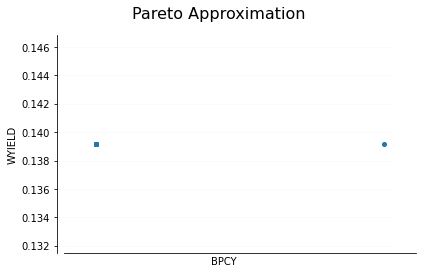

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.046386  0.043956  0.026710  0.021811|  0.000000  0.139159  0.131867  0.080131  0.065432|
    200|  0.044187  0.082269  0.046386  0.046616  0.003604|  0.123404  0.139159  0.139159  0.138613  0.001917|
    300|  0.046386  0.082269  0.046386  0.047104  0.005024|  0.123404  0.139159  0.139159  0.138844  0.002206|
    400|  0.046386  0.082269  0.046386  0.047104  0.005024|  0.123404  0.139159  0.139159  0.138844  0.002206|
    500|  0.046386  0.082269  0.046386  0.048898  0.009155|  0.123404  0.139159  0.139159  0.138056  0.004020|
    600|  0.046386  0.082269  0.046386  0.048898  0.009155|  0.123404  0.139159  0.139159  0.138057  0.004020|
    700|  0.046386  0.082269  0.046386  0.050692  0.011661|  0.123404  0.139159  0.139159  0.137269  0.005120|
    800|  0.046386  0.082269  0.046386  0.057510  0.016596|  0.123404  0.139159  0.139159  0.134275  0.007287|
 

In [6]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea = EA(problem, max_generations= 50, mp = True, visualizer = True)
final_pop = ea.run()

In [7]:
df = ea.dataframe()
df.to_csv('GOU_50gen.csv')
print(df)

   Modification  Size      BPCY    WYIELD
0  {'b0827': 4}     1  0.122525  0.091894


Building modification target list.
Running NSGAII


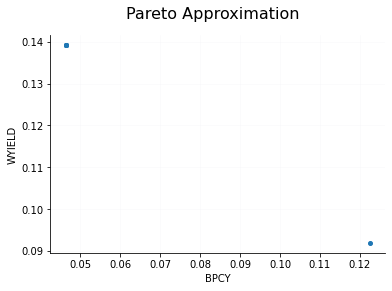

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.122525  0.045487  0.028472  0.023841|  0.000000  0.139159  0.135628  0.082659  0.065667|
    200|  0.045263  0.122525  0.046386  0.047099  0.007583|  0.091894  0.139159  0.139159  0.138541  0.004723|
    300|  0.046386  0.122525  0.046386  0.047909  0.010659|  0.091894  0.139160  0.139159  0.138214  0.006617|
    400|  0.046386  0.122525  0.046386  0.050502  0.016806|  0.029012  0.139160  0.139159  0.135695  0.014867|
    500|  0.046386  0.122525  0.046386  0.054359  0.023000|  0.091894  0.139161  0.139159  0.134275  0.014214|
    600|  0.046386  0.122525  0.046387  0.060765  0.028814|  0.091894  0.139161  0.139160  0.130494  0.017738|
    700|  0.046387  0.122525  0.046387  0.067172  0.032394|  0.091894  0.139161  0.139160  0.126713  0.019966|
    800|  0.046387  0.122525  0.046387  0.068388  0.029795|  0.091894  0.139161  0.139160  0.126871  0.018044|
 

In [8]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea2 = EA(problem2, max_generations= 50, mp = True, visualizer = True)
final_pop2 = ea2.run()

In [9]:
df2 = ea2.dataframe()
df2.to_csv('ROU_50gen.csv')
print(df2)

                                         Modification  Size      BPCY  \
0                              {'EX_cobalt2_e': 0.25}     1  0.000000   
1   {'MI1PP': 32, 'MALTtexi': 0.03125, 'LDH_D2': 0...     8  0.122525   
2   {'PGPP141pp': 0.03125, 'MALTtexi': 0.03125, 'L...     8  0.122525   
3   {'PGPP141pp': 0.03125, 'MI1PP': 32, 'LDH_D2': ...     8  0.122525   
4   {'PGPP141pp': 0.03125, 'MI1PP': 32, 'MALTtexi'...     8  0.122525   
..                                                ...   ...       ...   
83  {'PGPP141pp': 0.03125, 'MI1PP': 32, 'MALTtexi'...     9  0.122525   
84  {'PGPP141pp': 0.03125, 'MI1PP': 32, 'MALTtexi'...     9  0.122525   
85  {'PGPP141pp': 0.03125, 'MI1PP': 32, 'MALTtexi'...     9  0.122525   
86  {'PGPP141pp': 0.03125, 'MI1PP': 32, 'MALTtexi'...     9  0.122525   
87  {'PGPP141pp': 0.03125, 'MI1PP': 32, 'MALTtexi'...     9  0.122525   

      WYIELD  
0   0.000000  
1   0.091894  
2   0.091894  
3   0.091894  
4   0.091894  
..       ...  
83  0.091894  
84 

  0%|          | 0/1369 [00:00<?, ?it/s]

Building modification target list.
Computing essential genes.


100%|██████████| 1369/1369 [02:21<00:00,  9.67it/s]


Running NSGAII


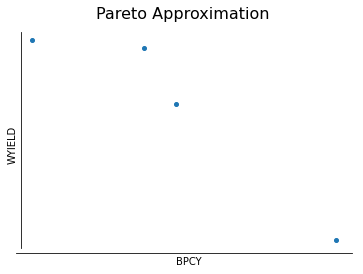

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.022394  0.046386  0.046386  0.044485  0.005287|  0.067183  0.139159  0.139159  0.133454  0.015860|
    200|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    300|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    400|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    500|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    600|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    700|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    800|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
 

In [10]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea3 = EA(problem3, max_generations= 50, mp = True, visualizer = True)
final_pop3 = ea3.run()

In [11]:
df3 = ea3.dataframe()
df3.to_csv('GKO_50gen.csv')
print(df3)

  Modification  Size      BPCY    WYIELD
0           {}     0  0.046386  0.139159


  0%|          | 0/2600 [00:00<?, ?it/s]

Building modification target list.
Computing essential reactions


100%|██████████| 2600/2600 [03:29<00:00, 12.40it/s]


Running NSGAII


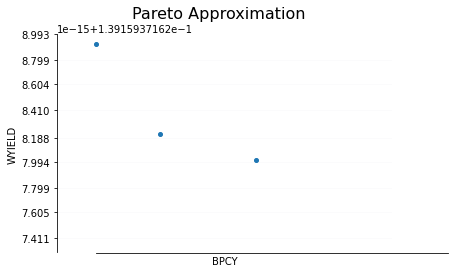

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.022394  0.046386  0.046386  0.045960  0.002512|  0.067183  0.139159  0.139159  0.137881  0.007536|
    200|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    300|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    400|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    500|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    600|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    700|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
    800|  0.046386  0.046386  0.046386  0.046386  0.000000|  0.139159  0.139159  0.139159  0.139159  0.000000|
 

In [12]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea4 = EA(problem4, max_generations= 50, mp = True, visualizer = True)
final_pop4 = ea4.run()

In [13]:
df4 = ea4.dataframe()
df4.to_csv('RKO_50gen.csv')
print(df4)

  Modification  Size      BPCY    WYIELD
0  {'ATPM': 0}     1  0.047055  0.141165
